In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load dan praproses data awal
df = pd.read_csv('https://github.com/nekowawolf/NASA-promise-dataset/raw/refs/heads/main/cm1.csv')
print("Ukuran dataset:", df.shape)
print("\nCek Missing Value:")
print(df.isnull().sum())
df = df.dropna()
print("\nUkuran dataset setelah hapus missing value:", df.shape)


Ukuran dataset: (498, 22)

Cek Missing Value:
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

Ukuran dataset setelah hapus missing value: (498, 22)


In [ ]:
# Encode label dan pisahkan fitur-target
df['defects'] = df['defects'].astype(int)
X = df.drop(columns='defects')
y = df['defects']

In [ ]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Tangani imbalance data menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

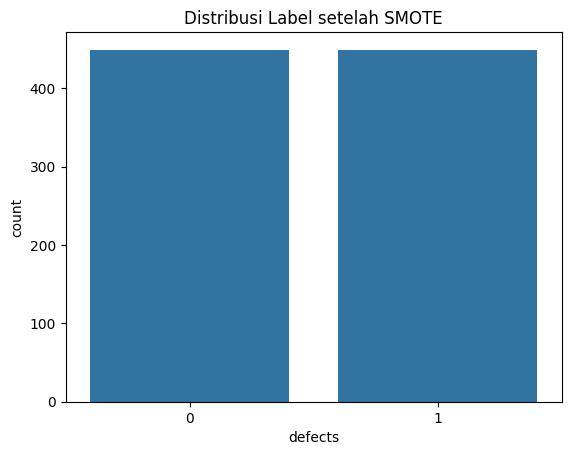

In [ ]:
# Visualisasi distribusi label setelah SMOTE
sns.countplot(x=y_resampled)
plt.title('Distribusi Label setelah SMOTE')
plt.show()

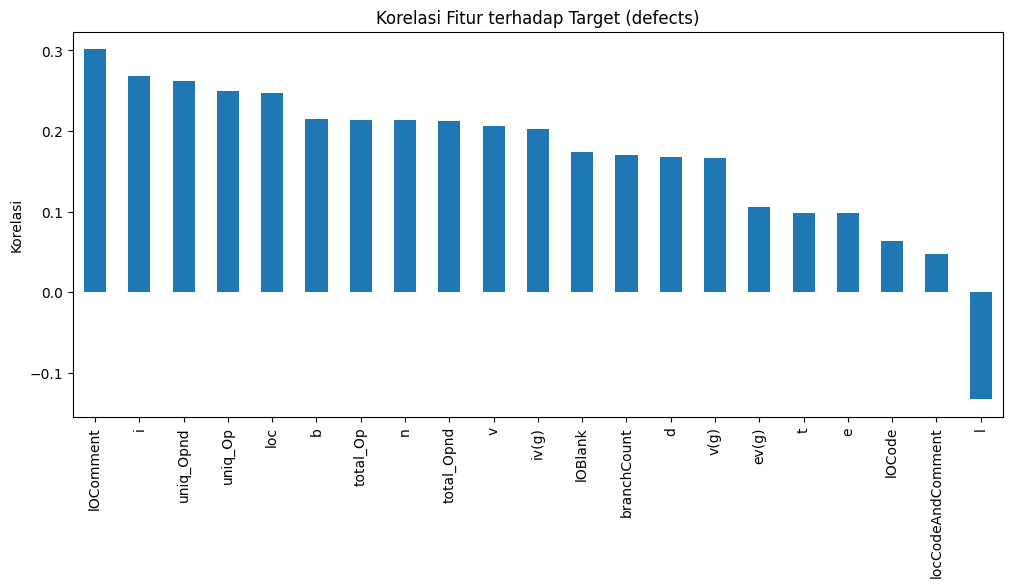

In [ ]:
# Analisis korelasi terhadap target
df_final = X_scaled.copy()
df_final['defects'] = y.values
correlations = df_final.corr()['defects'].drop('defects')
correlations.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title('Korelasi Fitur terhadap Target (defects)')
plt.ylabel('Korelasi')
plt.show()

In [ ]:
# Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Bandingkan 3 algoritma
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Akurasi:", acc)
    print(classification_report(y_test, y_pred, zero_division=0))


Model: Logistic Regression
Akurasi: 0.7611111111111111
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        96
           1       0.73      0.79      0.75        84

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180


Model: Random Forest
Akurasi: 0.9277777777777778
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        96
           1       0.88      0.98      0.93        84

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180


Model: K-Nearest Neighbors
Akurasi: 0.7888888888888889
              precision    recall  f1-score   support

           0       0.97      0.62      0.76        96
           1       0.69      0.98      0.81        84

    accuracy        